In [2]:
import matplotlib.pyplot as plt
from medpy.io import load
import SimpleITK as sitk
import os
import glob

In [110]:
image_path = 'images\\166_t1.mha'
image = sitk.ReadImage(image_path)
swapped_image = sitk.PermuteAxes(image, [0, 1, 2])
image_array = sitk.GetArrayFromImage(image)
image_array = sitk.GetArrayFromImage(swapped_image)

In [111]:
print(image_array.shape)
middle_slice = image_array.shape[0] // 2

(17, 512, 512)


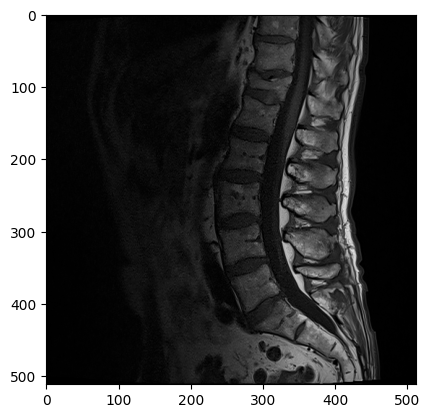

In [112]:
plt.imshow(image_array[middle_slice], cmap='gray')
plt.show()

In [6]:
plt.imsave('test_image.png', image_array[middle_slice], cmap='gray')

In [16]:
# image_to_swap = sitk.ReadImage('masks/1_t1.mha')
# swapped_image = sitk.PermuteAxes(image_to_swap, [2, 1, 0])
# sitk.WriteImage(swapped_image, 'test_mask_file.mha')

In [15]:
directory = 'images'
output_directory = os.path.join('fixed_images')
t1_files = glob.glob(os.path.join(directory, '*_t1.mha'))
for t1_file in t1_files:
    image_to_swap = sitk.ReadImage(t1_file)
    swapped_image = sitk.PermuteAxes(image_to_swap, [1, 2, 0])
    file_name = os.path.basename(t1_file)
    output_path = os.path.join(output_directory, file_name)
    sitk.WriteImage(swapped_image, output_path)

In [17]:
directory = 'images'
output_directory = os.path.join('fixed_images')
t2_files = glob.glob(os.path.join(directory, '*_t2.mha'))
for t2_file in t2_files:
    image_to_swap = sitk.ReadImage(t2_file)
    swapped_image = sitk.PermuteAxes(image_to_swap, [1, 2, 0])
    file_name = os.path.basename(t2_file)
    output_path = os.path.join(output_directory, file_name)
    sitk.WriteImage(swapped_image, output_path)

In [22]:
fixed_images_directory = 'fixed_images'

for file_name in os.listdir(fixed_images_directory):
    if file_name.endswith('.mha'):
        file_path = os.path.join(fixed_images_directory, file_name)
        image_to_convert = sitk.ReadImage(file_path)
        image_to_convert_array = sitk.GetArrayFromImage(image_to_convert)

        middle_slice = image_to_convert_array.shape[0] // 2
        slice_to_save = image_to_convert_array[middle_slice]

        output_png_path = os.path.join('scan_pngs', file_name.replace('.mha', '.png'))
        plt.imsave(output_png_path, slice_to_save, cmap='gray')
